In [2]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
from antropy import spectral_entropy, lziv_complexity
from scipy.stats import entropy
from tqdm import tqdm


Mean Entropy: 0.9322, Mean Complexity: 1.0633


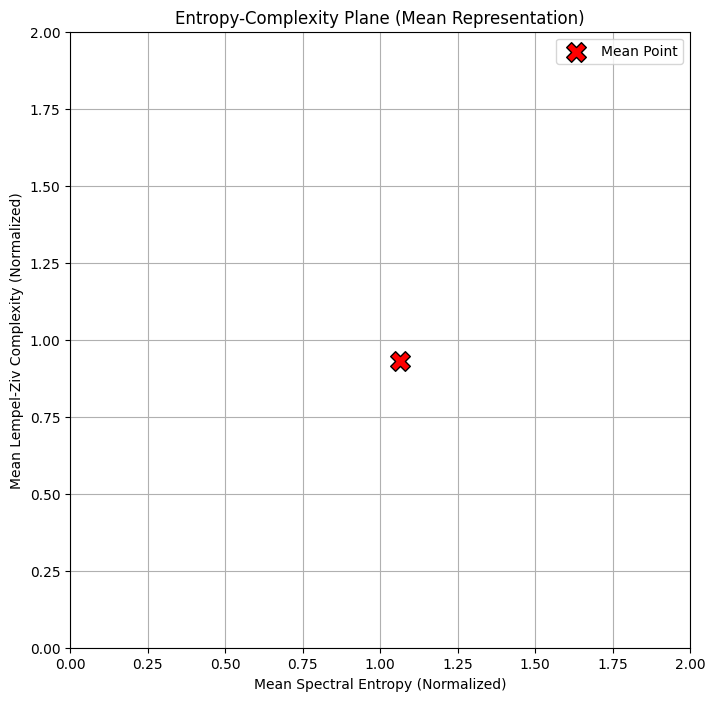

Mean Entropy: 0.1141, Mean Complexity: 0.0709


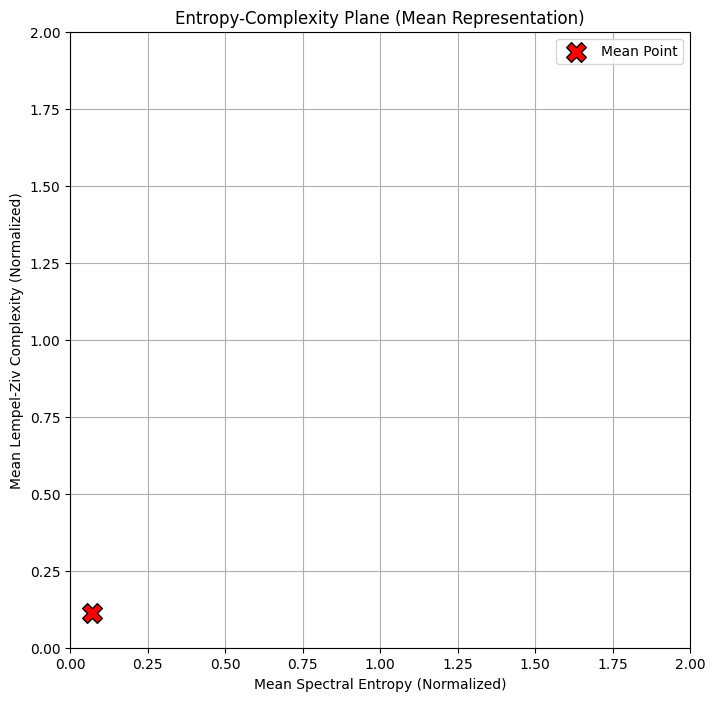

Mean Entropy: 0.3455, Mean Complexity: 0.1893


/Users/mverzhbitskiy/Documents/GitHub/musicAnalysis/venv/lib/python3.11/site-packages/antropy/entropy.py:255: RuntimeWarning: invalid value encountered in divide
  psd_norm = psd / psd.sum(axis=axis, keepdims=True)


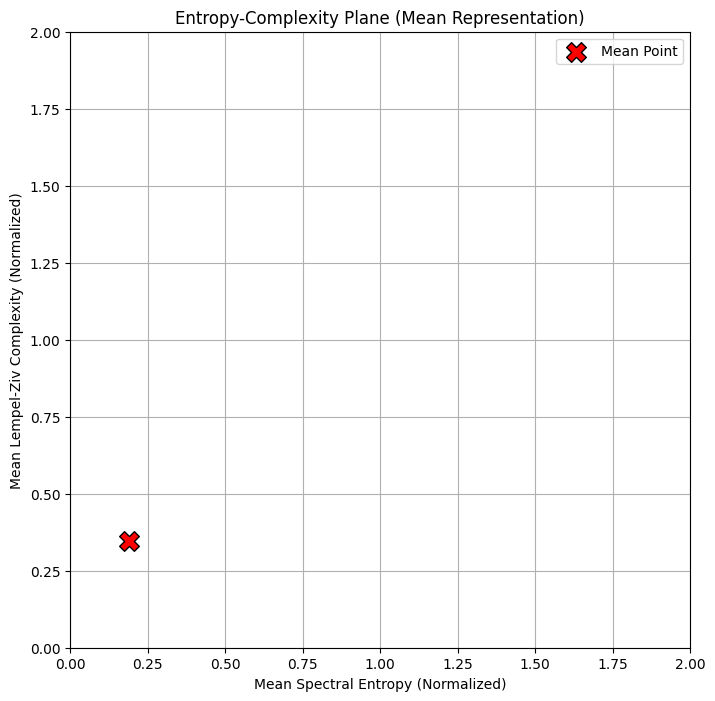

In [19]:
def compute_mean_entropy_complexity(wav_file, window_size=1024, hop_size=512):
    """
    Compute the MEAN spectral entropy and Lempel-Ziv complexity for the entire audio signal.
    Returns a single (mean_entropy, mean_complexity) point.
    """
    # Load audio file and normalize
    y, sr = librosa.load(wav_file, sr=None, mono=True)
    # y = (y - np.mean(y)) / np.std(y)  # Normalize
    
    num_windows = (len(y) - window_size) // hop_size + 1
    entropies = []
    complexities = []
    
    for i in range(num_windows):
        # Extract window
        start = i * hop_size
        end = start + window_size
        window = y[start:end]
        
        # Compute spectral entropy (normalized)
        entropy = spectral_entropy(window, sf=sr, method='fft', nperseg=window_size, normalize=True)
        
        # Binarize signal for Lempel-Ziv complexity
        binary_window = (window >= np.median(window)).astype(int)
        binary_str = ''.join(binary_window.astype(str))
        complexity = lziv_complexity(binary_str, normalize=True)  # Normalized
        
        entropies.append(entropy)
        complexities.append(complexity)
    
    # Compute mean values across all windows
    mean_entropy = np.mean(entropies)
    mean_complexity = np.mean(complexities)
    
    return mean_entropy, mean_complexity

def plot_mean_point(mean_entropy, mean_complexity):
    """Plot a single mean point on the entropy-complexity plane."""
    plt.figure(figsize=(8, 8))
    plt.scatter(mean_entropy, mean_complexity, s=200, c='red', marker='X', edgecolors='k', label='Mean Point')
    plt.xlabel('Mean Spectral Entropy (Normalized)')
    plt.ylabel('Mean Lempel-Ziv Complexity (Normalized)')
    plt.title('Entropy-Complexity Plane (Mean Representation)')
    plt.grid(True)
    plt.legend()
    plt.xlim(0, 2)  # Entropy is normalized between 0-1
    plt.ylim(0, 2)  # Complexity is normalized between 0-1
    plt.show()

# Example usage 1
wav_file = "data/jazz/whitenoise.wav"  # Replace with your WAV file path
mean_entropy, mean_complexity = compute_mean_entropy_complexity(wav_file)
print(f"Mean Entropy: {mean_entropy:.4f}, Mean Complexity: {mean_complexity:.4f}")
plot_mean_point(mean_complexity, mean_entropy)

# Example usage 2
wav_file = "data/jazz/440wave.wav"  # Replace with your WAV file path
mean_entropy, mean_complexity = compute_mean_entropy_complexity(wav_file)
print(f"Mean Entropy: {mean_entropy:.4f}, Mean Complexity: {mean_complexity:.4f}")
plot_mean_point(mean_complexity, mean_entropy)

# Example usage 3
wav_file = "data/classical/1727.wav"  # Replace with your WAV file path
mean_entropy, mean_complexity = compute_mean_entropy_complexity(wav_file)
print(f"Mean Entropy: {mean_entropy:.4f}, Mean Complexity: {mean_complexity:.4f}")
plot_mean_point(mean_complexity, mean_entropy)


Centroid (Mean Entropy, Mean Complexity): (0.4245, 0.3809)


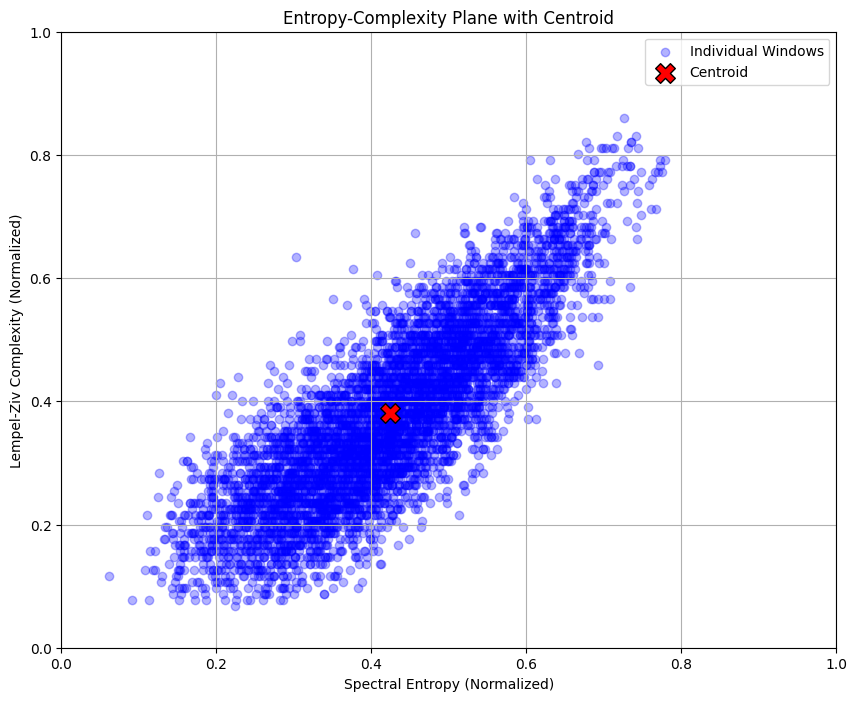

In [11]:
def compute_entropy_complexity(wav_file, window_size=1024, hop_size=512):
    """
    Compute entropy and complexity for all windows in the audio signal.
    Returns arrays of entropy and complexity values.
    """
    # Load audio file and normalize
    y, sr = librosa.load(wav_file, sr=None, mono=True)
    y = (y - np.mean(y)) / np.std(y)  # Normalize
    
    num_windows = (len(y) - window_size) // hop_size + 1
    entropies = []
    complexities = []
    
    for i in range(num_windows):
        # Extract window
        start = i * hop_size
        end = start + window_size
        window = y[start:end]
        
        # Compute spectral entropy (normalized)
        entropy = spectral_entropy(window, sf=sr, method='fft', nperseg=window_size, normalize=True)
        
        # Binarize signal for Lempel-Ziv complexity
        binary_window = (window >= np.median(window)).astype(int)
        binary_str = ''.join(binary_window.astype(str))
        complexity = lziv_complexity(binary_str, normalize=True)  # Normalized
        
        entropies.append(entropy)
        complexities.append(complexity)
    
    return np.array(entropies), np.array(complexities)

def compute_centroid(entropies, complexities):
    """Compute the centroid (mean) of entropy-complexity points."""
    return np.mean(entropies), np.mean(complexities)

def plot_centroid(entropies, complexities, centroid):
    """Plot all points and the centroid."""
    plt.figure(figsize=(10, 8))
    # Plot all points
    plt.scatter(entropies, complexities, alpha=0.3, c='blue', label='Individual Windows')
    # Plot centroid
    plt.scatter(centroid[0], centroid[1], s=200, c='red', marker='X', edgecolors='k', label='Centroid')
    plt.xlabel('Spectral Entropy (Normalized)')
    plt.ylabel('Lempel-Ziv Complexity (Normalized)')
    plt.title('Entropy-Complexity Plane with Centroid')
    plt.grid(True)
    plt.legend()
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

# Example usage
wav_file = "data/jazz/Kubawa.mp3"  # Replace with your WAV file path

# Step 1: Compute entropy and complexity for all windows
entropies, complexities = compute_entropy_complexity(wav_file)

# Step 2: Compute centroid
centroid = compute_centroid(entropies, complexities)
print(f"Centroid (Mean Entropy, Mean Complexity): ({centroid[0]:.4f}, {centroid[1]:.4f})")

# Step 3: Plot
plot_centroid(entropies, complexities, centroid)

Processing files: 100%|██████████| 320/320 [1:44:53<00:00, 19.67s/file]    


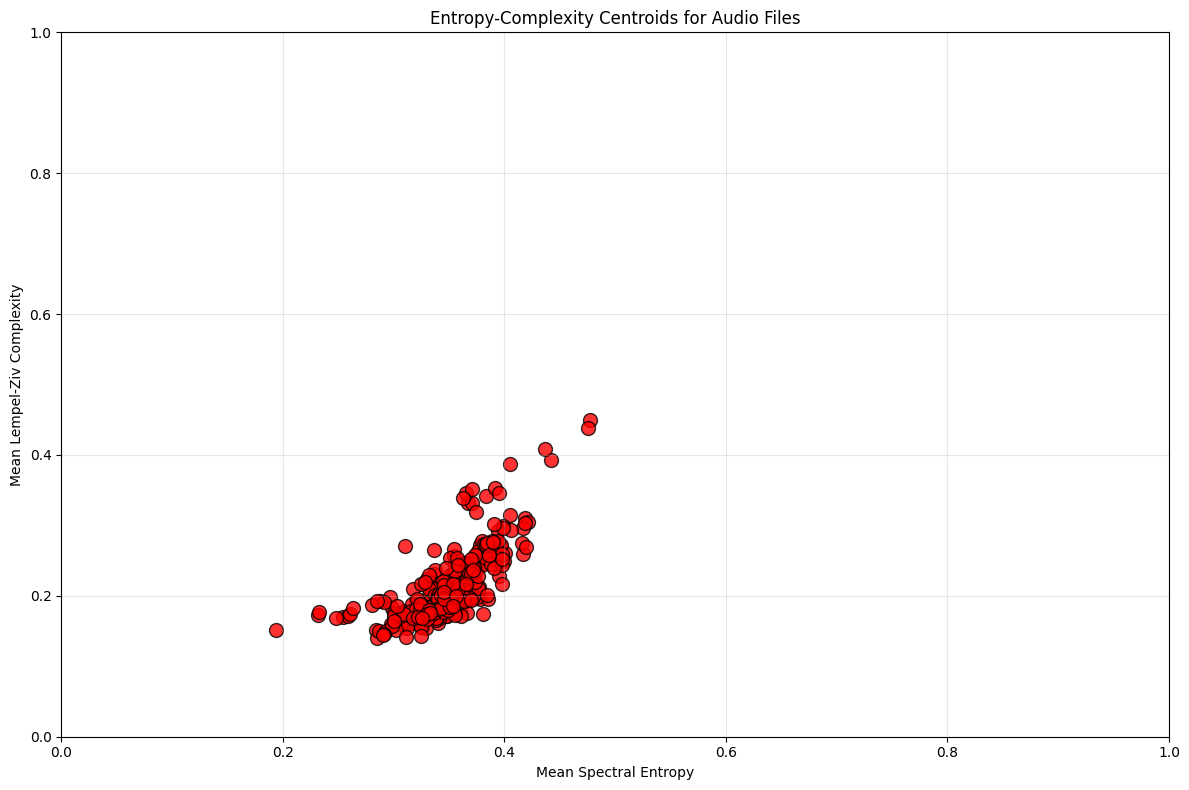

In [ ]:
def compute_centroid(wav_file, window_size=1024, hop_size=512):
    """Compute entropy-complexity centroid for a single audio file."""
    y, sr = librosa.load(wav_file, sr=None, mono=True)
    y = (y - np.mean(y)) / np.std(y)
    
    num_windows = (len(y) - window_size) // hop_size + 1
    entropies, complexities = [], []
    
    for i in range(num_windows):
        start = i * hop_size
        end = start + window_size
        window = y[start:end]
        
        # Spectral entropy
        entropy = spectral_entropy(window, sf=sr, method='fft', nperseg=window_size, normalize=True)
        
        # Lempel-Ziv complexity
        binary_window = (window >= np.median(window)).astype(int)
        binary_str = ''.join(binary_window.astype(str))
        complexity = lziv_complexity(binary_str, normalize=True)
        
        entropies.append(entropy)
        complexities.append(complexity)
    
    return np.mean(entropies), np.mean(complexities)

def plot_all_centroids(wav_dir, output_plot="centroids_plot.png"):
    """Plot centroids for all audio files in a directory with progress bar."""
    centroids = []
    filenames = []
    
    # Get list of files to process
    files_to_process = [f for f in os.listdir(wav_dir) 
                       if f.lower().endswith(('.wav', '.mp3'))]
    
    # Process files with progress bar
    for file in tqdm(files_to_process, desc="Processing files", unit="file"):
        wav_path = os.path.join(wav_dir, file)
        try:
            centroid = compute_centroid(wav_path)
            centroids.append(centroid)
            filenames.append(file)
        except Exception as e:
            print(f"\nError processing {file}: {str(e)}")

    # Extract coordinates
    entropies = [c[0] for c in centroids]
    complexities = [c[1] for c in centroids]
    
    # Create plot
    plt.figure(figsize=(12, 8))
    plt.scatter(entropies, complexities, s=100, c='red', edgecolors='k', alpha=0.8)
    plt.xlabel("Mean Spectral Entropy")
    plt.ylabel("Mean Lempel-Ziv Complexity")
    plt.title("Entropy-Complexity Centroids for Audio Files")
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.savefig(output_plot, dpi=150)
    plt.show()

# Run with your directory
wav_directory = "data/classical"
plot_all_centroids(wav_directory)

Sample rate is:  44100
Num of windows:  213
Num of unique windows: 5878
Ranked z vectors:  [[1003 1044 1085 ... 1678 1719 1760]
 [1885 1927 1969 ... 1483 1442 1401]
 [1288 1247 1206 ...  614  573  532]
 ...
 [ 926  885  844 ...  252  211  170]
 [  40    2   45 ...  638  679  720]
 [ 833  874  915 ... 1506 1547 1588]]
Probabilities for z vectors:  [0.00469484 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484
 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484
 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484
 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484
 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484
 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484
 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484
 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484
 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484 0.00469484
 0.00469484 0.00469484 0.00469484 0.00469484 0.0

/var/folders/ww/ltx99cqx36v87nl20lt5x_zc0000gn/T/ipykernel_51803/953613932.py:12: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(file_path)   # data is typically int16 or int32


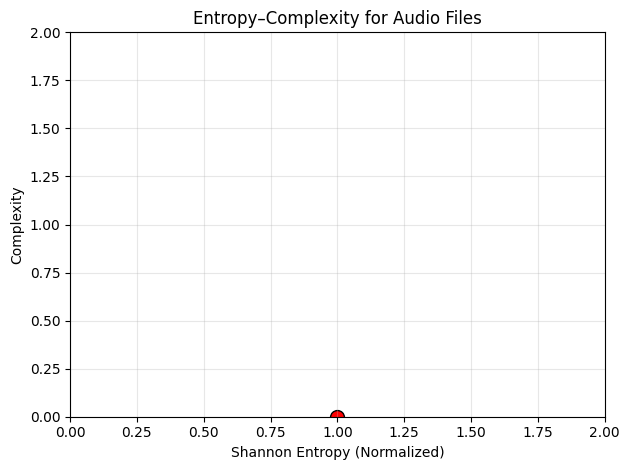

In [38]:
import numpy as np
from scipy.io import wavfile

def create_z_vectors_scipy(file_path, window_size, hop_size):
    """
    Alternative method to create z-vectors from a WAV file using scipy.io.wavfile.
    1. Read a PCM WAV file (16-bit or 32-bit typically).
    2. Convert to float, standardize amplitude.
    3. Create overlapping windows.
    """
    # 1) Read data and sample rate from wav
    sr, data = wavfile.read(file_path)   # data is typically int16 or int32
    print("Sample rate is: ", sr)
    # 2) Convert to mono if multiple channels
    if data.ndim == 2:
        # E.g., shape = (num_samples, num_channels)
        data = data.mean(axis=1)  # simple average to mono
    
    # 3) Convert to float
    data = data.astype(np.float32)
    
    # 4) Standardize (mean=0, std=1)
    data_mean = np.mean(data)
    data_std = np.std(data) + 1e-12
    data = (data - data_mean) / data_std
    
    # 5) Create windows
    num_samples = len(data)
    num_windows = (num_samples - window_size) // hop_size
    if num_windows < 1:
        raise ValueError("Audio too short for the given window/hop parameters.")
    
    vectors = []
    for i in range(num_windows):
        start = i * hop_size
        end = start + window_size
        window = data[start:end]
        vectors.append(window)
    
    return np.array(vectors)


def rank_vector(z):
    return np.argsort(z).argsort() + 1


def calculate_shannon_entropy(probabilities):
    """
    Shannon entropy: H = -sum( p[i] * log2( p[i] ) ), ignoring zero-prob terms.
    """
    return -np.sum(probabilities * np.log2(probabilities + 1e-12))


def calculate_jmax(n):
    """
    Maximum possible Jensen–Shannon divergence for distributions of dimension 
        J_max(n) = -2*((n+1)/n*np.log2(n+1)-2*np.log2(n+1)-2*np.log2(2*n)+np.log2(n))
    """
    J_max = -0.5*((n+1)/n*np.log2(n+1)-2*np.log2(n+1)-2*np.log2(2*n)+np.log2(n))
    return J_max


def row_probabilities(ranked_z_vectors):
    # 1) Find unique rows, their counts
    unique_rows, counts = np.unique(ranked_z_vectors, axis=0, return_counts=True)
    
    # 2) Create a dictionary: (row as tuple) -> probability
    freq_map = {}
    for row_u, c in zip(unique_rows, counts):
        freq_map[tuple(row_u)] = c / len(ranked_z_vectors)
    
    # 3) Convert each row in ranked_z_vectors to the probability
    probabilities = np.array([freq_map[tuple(r)] for r in ranked_z_vectors])
    return probabilities


def process_audio(file_path):
    """
    Main function that returns:
      - H:   The *normalized* Shannon entropy of the probability distribution of windows.
      - C(p): Complexity = ( J(p, p_u) / J_max ) * H(p).
      1) Create z-vectors (each is n samples, hopped by m).
      2) Rank each z-vector from 1..n.
      3) Make probabilities
      4) Make uniform probability
      5) Calculate Shannon entropy of p, normalize by log2(#unique_vectors).
      6) Calculate Jensen-Shannon divergence J(p, p_u).
      7) Calculate J_max for #unique_vectors.
      8) Complexity = (J / J_max) * H.
    """
    
    # 1) Create z-vectors
    z_vectors = create_z_vectors_scipy(file_path, 2024, 1024) # path, window size, hop size
    num_windows = z_vectors.shape[0]
    print("Num of windows: ", num_windows)
    print("Num of unique windows:", len(set(z_vectors.flatten())))

    # 2) Rank each window
    ranked_z_vectors = np.array([rank_vector(z) for z in z_vectors])
    print("Ranked z vectors: ", ranked_z_vectors)

    # 3) Make probabilities
    p = row_probabilities(ranked_z_vectors)
    ranked_z_vectors_size = len(ranked_z_vectors)
    print("Probabilities for z vectors: ", p)
    print("Length of z_vector ", ranked_z_vectors_size)
    print("Unique probabilities", set(p.flatten()))

    # 4) Make uniform probability
    p_u = np.ones(ranked_z_vectors_size) / ranked_z_vectors_size
    print("Probabilities for universal distribution: ", p_u)

    # 5) Calculate Shannon entropy of p
    #    H_raw = -sum( p[i] * log2(p[i]) )
    H_raw = calculate_shannon_entropy(p)

    #    Normalize by log2(n_unique) so that H is in [0,1]
    H_max = np.log2(ranked_z_vectors_size)
    H = H_raw / H_max if H_max > 0 else 0.0

    # 6) Jensen-Shannon divergence: J(p, p_u) = S((p+p_u)/2) - 0.5*S(p) - 0.5*S(p_u)
    J = (calculate_shannon_entropy(0.5 * (p + p_u)) - 0.5 * calculate_shannon_entropy(p) - 0.5 * calculate_shannon_entropy(p_u))
    print("Jensen-Shannon divergence: ", J)

    # 7) Calculate J_max
    J_max = calculate_jmax(ranked_z_vectors_size) if ranked_z_vectors_size > 1 else 1e-12  # avoid /0 if n_unique=1
    print("J_max: ", J_max)
    
    # 8) Complexity
    complexity = (J / J_max) * H
    
    return H, complexity


entropy, complexity = process_audio("data/jazz/440wave.wav")
print("Entropy: ", entropy," Complexity: ", complexity)
plt.scatter(entropy, complexity, s=100, c='red', edgecolor='black')
plt.xlabel("Shannon Entropy (Normalized)")
plt.ylabel("Complexity")
plt.title("Entropy–Complexity for Audio Files")
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Sample rate is: 44100
Number of samples: 705600
Num of windows:  688
Num of unique windows: 614
Ranked z vectors:  [[1157 1670  513 ...  646  632 1907]
 [1328 1433  149 ...  346  947 1810]
 [1656 1119  182 ...   28 1282 1487]
 ...
 [1550  285 1016 ...  835 1960  661]
 [1234   63 1348 ... 1137 1625  341]
 [ 918  355 1642 ... 1463 1289    1]]
Probabilities for z vectors:  [0.00145349 0.00145349 0.00145349 0.00145349 0.00145349 0.00145349
 0.00145349 0.00145349 0.00145349 0.00145349 0.00145349 0.00145349
 0.00145349 0.00145349 0.00145349 0.00290698 0.00145349 0.00145349
 0.00145349 0.00290698 0.00145349 0.00145349 0.00145349 0.00145349
 0.00145349 0.00145349 0.00145349 0.00145349 0.00290698 0.00290698
 0.00581395 0.00436047 0.00145349 0.00145349 0.00145349 0.00145349
 0.00145349 0.00145349 0.00145349 0.00436047 0.00581395 0.00145349
 0.00145349 0.00436047 0.00145349 0.00145349 0.00145349 0.00145349
 0.00145349 0.00145349 0.00145349 0.00436047 0.00726744 0.00145349
 0.00145349 0.00145349 0

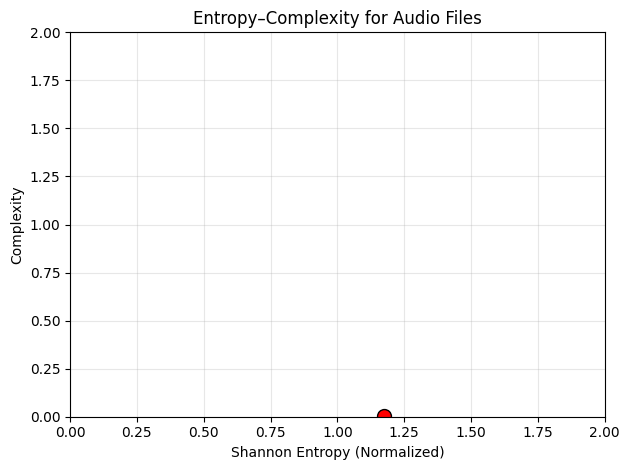

In [35]:
import numpy as np
from scipy.io import wavfile

def create_z_vectors_scipy(file_path, window_size, hop_size):
    """
    Create z-vectors from an audio file using librosa's frame approach.
    
    Parameters:
    - file_path (str): Path to the WAV file.
    - window_size (int): Number of samples per window.
    - hop_size (int): Number of samples between the starts of consecutive windows.
    
    Returns:
    - vectors (np.ndarray): Array of shape (number_of_frames, window_size) containing the z-vectors.
    
    Raises:
    - ValueError: If the audio is too short for the given window and hop sizes.
    """
    # 1) Load audio with librosa
    #    sr=None preserves the original sampling rate
    #    mono=True converts to mono automatically.
    data, sr = librosa.load(file_path, sr=None, mono=True)
    print("Sample rate is:", sr)
    print("Number of samples:", len(data))
    
    # 2) Standardize (mean=0, std=1)
    data_mean = np.mean(data)
    data_std = np.std(data) + 1e-12  # Prevent division by zero
    data = (data - data_mean) / data_std
    
    # 3) Create overlapping frames using librosa.util.frame
    #    The frames are returned with shape (window_size, number_of_frames)
    frames = librosa.util.frame(data, frame_length=window_size, hop_length=hop_size)
    
    # 4) Transpose to get shape (number_of_frames, window_size)
    vectors = frames.T  # Now each row is a window/frame
    
    # 5) Check if there are enough frames
    num_windows = vectors.shape[0]
    if num_windows < 1:
        raise ValueError("Audio too short for the given window/hop parameters.")
    
    return vectors


def rank_vector(z):
    return np.argsort(z).argsort() + 1


def calculate_shannon_entropy(probabilities):
    """
    Shannon entropy: H = -sum( p[i] * log2( p[i] ) ), ignoring zero-prob terms.
    """
    return -np.sum(probabilities * np.log2(probabilities + 1e-12))


def calculate_jmax(n):
    """
    Maximum possible Jensen–Shannon divergence for distributions of dimension 
        J_max(n) = -2*((n+1)/n*np.log2(n+1)-2*np.log2(n+1)-2*np.log2(2*n)+np.log2(n))
    """
    J_max = -2*((n+1)/n*np.log2(n+1)-2*np.log2(n+1)-2*np.log2(2*n)+np.log2(n))
    return J_max


def row_probabilities(ranked_z_vectors):
    # 1) Find unique rows, their counts
    unique_rows, counts = np.unique(ranked_z_vectors, axis=0, return_counts=True)
    
    # 2) Create a dictionary: (row as tuple) -> probability
    freq_map = {}
    for row_u, c in zip(unique_rows, counts):
        freq_map[tuple(row_u)] = c / len(ranked_z_vectors)
    
    # 3) Convert each row in ranked_z_vectors to the probability
    probabilities = np.array([freq_map[tuple(r)] for r in ranked_z_vectors])
    return probabilities


def process_audio(file_path):
    """
    Main function that returns:
      - H:   The *normalized* Shannon entropy of the probability distribution of windows.
      - C(p): Complexity = ( J(p, p_u) / J_max ) * H(p).
      1) Create z-vectors (each is n samples, hopped by m).
      2) Rank each z-vector from 1..n.
      3) Make probabilities
      4) Make uniform probability
      5) Calculate Shannon entropy of p, normalize by log2(#unique_vectors).
      6) Calculate Jensen-Shannon divergence J(p, p_u).
      7) Calculate J_max for #unique_vectors.
      8) Complexity = (J / J_max) * H.
    """
    
    # 1) Create z-vectors
    z_vectors = create_z_vectors_scipy(file_path, 2024, 1024) # path, window size, hop size
    num_windows = z_vectors.shape[0]
    print("Num of windows: ", num_windows)
    print("Num of unique windows:", len(set(z_vectors.flatten())))

    # 2) Rank each window
    ranked_z_vectors = np.array([rank_vector(z) for z in z_vectors])
    print("Ranked z vectors: ", ranked_z_vectors)

    # 3) Make probabilities
    p = row_probabilities(ranked_z_vectors)
    ranked_z_vectors_size = len(ranked_z_vectors)
    print("Probabilities for z vectors: ", p)
    print("Length of z_vector ", ranked_z_vectors_size)
    print("Unique probabilities", set(p.flatten()))

    # 4) Make uniform probability
    p_u = np.ones(ranked_z_vectors_size) / ranked_z_vectors_size
    print("Probabilities for universal distribution: ", p_u)

    # 5) Calculate Shannon entropy of p
    #    H_raw = -sum( p[i] * log2(p[i]) )
    H_raw = calculate_shannon_entropy(p)

    #    Normalize by log2(n_unique) so that H is in [0,1]
    H_max = np.log2(ranked_z_vectors_size)
    H = H_raw / H_max if H_max > 0 else 0.0

    # 6) Jensen-Shannon divergence: J(p, p_u) = S((p+p_u)/2) - 0.5*S(p) - 0.5*S(p_u)
    J = (calculate_shannon_entropy(0.5 * (p + p_u)) - 0.5 * calculate_shannon_entropy(p) - 0.5 * calculate_shannon_entropy(p_u))
    print("Jensen-Shannon divergence: ", J)

    # 7) Calculate J_max
    J_max = calculate_jmax(ranked_z_vectors_size) if ranked_z_vectors_size > 1 else 1e-12  # avoid /0 if n_unique=1
    print("J_max: ", J_max)
    
    # 8) Complexity
    complexity = (J / J_max) * H
    
    return H, complexity


entropy, complexity = process_audio("data/jazz/sinHyp.wav")
print("Entropy: ", entropy," Complexity: ", complexity)
plt.scatter(entropy, complexity, s=100, c='red', edgecolor='black')
plt.xlabel("Shannon Entropy (Normalized)")
plt.ylabel("Complexity")
plt.title("Entropy–Complexity for Audio Files")
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()